# Introduction

<div class="alert alert-info">
<b>Situation</b>: <br>
I want to know the wind speed during my last measurement campaign in Overpelt from 1 October 2017 till 30 November 2017.
<br>
</div>

[VMM - Waterinfo](https://www.waterinfo.be/) provides those data for Flanders, with an interactive data portal and different download functionalities:

![](./images/waterinfo_screenshot.png)

The procedure to download the data set of interest:
* Go to `Maps and graphs` > `Download`
* In the section `1D Meteorological parameters`, select `Wind velocity`
* Select `Overpelt` and click `View and Download data`
* For both the `start date` and `end date`, click in the calender until you selected the required dates
* Click the right-top `download` icon, select `CSV` and click `download` again
* Provide a name for the data set and store the provided ZIP file
* Unzip to get the CSV data...

Downloading the data manually a single time is ok. However, when different variables (e.g. wind speed), other locations or other time periods are required, the manual download procedure becomes rather tedious...

Hence to support (lifewatch) researchers to get data from [waterinfo.be](https://www.waterinfo.be/), we developed an **R package**, called [wateRinfo](https://inbo.github.io/wateRinfo/index.html).

![](./images/wateRinfo_printscreen.png)

# DEMO wateRinfo 

## Installation

Once installed, loading the functionalities is similar to any other R package:

In [8]:
library(wateRinfo)

## Finding data

A number of variables are predefined and directly available for download. To have an overview of these variables, use the command `supported_variables`, which can be provided in either english or dutch:

In [9]:
supported_variables('en')

,variable_en
1,discharge
6,soil_saturation
7,soil_moisture
8,dew_point_temperature
9,ground_temperature
10,ground_heat
11,irradiance
12,air_pressure
13,air_temperature_175cm
14,rainfall


Wind speed is one of the available variables. The next step is to find out the available stations to check if `Overpelt` is available. Use the command `get_stations` to find out the stations for a given variable:

In [53]:
get_stations('wind_speed')

ts_id,station_latitude,station_longitude,station_id,station_no,station_name,stationparameter_name,parametertype_name,ts_unitsymbol,dataprovider
79226042,50.86543,4.707799,32021,HIS_M08_045,Heverlee_M,WSpeed,U,m/s,VMM
78653042,51.16224,4.845708,12212,ME10_011,Herentals_ME,WSpeed,U,m/s,VMM
79294042,50.84753,5.165932,32033,HIS_M09_026,Runkelen_M,WSpeed,U,m/s,VMM
78568042,51.27226,3.728299,12207,ME03_017,Boekhoute_ME,WSpeed,U,m/s,VMM
78636042,50.73795,5.141976,12211,ME09_012,Niel-bij-St.-Truiden_ME,WSpeed,U,m/s,VMM
79345042,50.90148,5.456408,32042,HIS_M09_035,Beverst_M,WSpeed,U,m/s,VMM
78670042,51.20300,5.439589,12213,ME11_002,Overpelt_ME,WSpeed,U,m/s,VMM
79277042,51.01085,5.346698,32030,HIS_M09_025,Zonhoven_M,WSpeed,U,m/s,VMM
78551042,51.02263,2.970584,12206,ME01_003,Zarren_ME,WSpeed,U,m/s,VMM
78619042,50.88663,4.094898,12210,ME07_006,Liedekerke_ME,WSpeed,U,m/s,VMM


## Downloading data

Downloads are always based on the usage of a given identifier, `ts_id`. Hence, by providing the proper `ts_id` (corresponding to wind speed data from Overpelt) to the download function `get_timeseries_tsid`, we can request the data series. The `ts_id` is 78670042:

In [73]:
wind_speed <- get_timeseries_tsid("78670042", 
                                  from = "2017-10-01",
                                  to = "2017-11-30")
head(wind_speed)

Timestamp,Value,Quality Code
2017-10-01 00:00:00,0.58,130
2017-10-01 00:15:00,0.82,130
2017-10-01 00:30:00,0.58,130
2017-10-01 00:45:00,0.70,130
2017-10-01 01:00:00,0.64,130
2017-10-01 01:15:00,0.56,130


## Using the data in R and beyond...

As the output is a `data.frame`, the data can be used and analysed further in R:

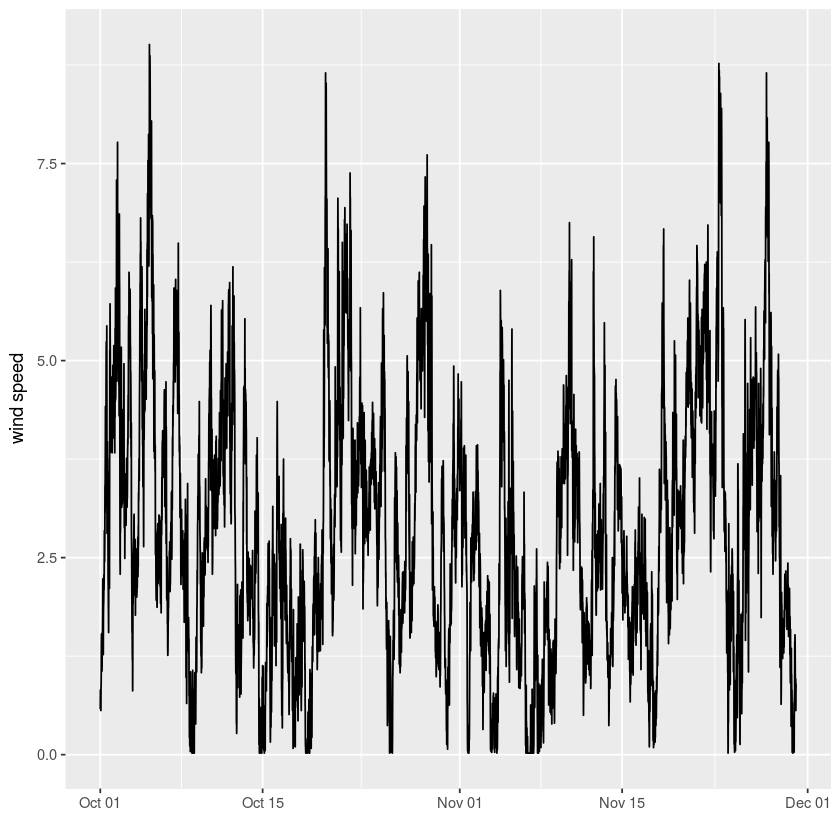

In [58]:
library(ggplot2)
ggplot(wind_speed, aes(x = Timestamp, y = Value)) + 
    geom_line() + 
    xlab("") + ylab("wind speed")

Or maybe save the data to a `CSV` file:

In [60]:
write.csv(wind_speed, "overpelt_wind_speed_20171001_20171130.csv")

# I'd like a wind rose!

Visualisation wind data is most useful as a wind rose. Let's download the wind direction data as well to combine both in a single figure and using the existing functioanlity reported [here](https://rpubs.com/mariner610/windrose).

First, load some additional packages:

In [132]:
library(dplyr)
library(ggplot2)

With the help of the [tidyverse](https://www.tidyverse.org/) packages, we can easily combine the statements above to download the data:

In [69]:
wind_direction <- get_stations('wind_direction') %>% 
    filter(station_name == "Overpelt_ME") %>%
    select(ts_id) %>%
    get_timeseries_tsid(from = "2017-10-01", 
                        to = "2017-11-30") %>%
    rename(wind_direction = Value)

In [70]:
head(wind_direction)

Timestamp,wind_direction,Quality Code
2017-10-01 00:00:00,91,130
2017-10-01 00:15:00,110,130
2017-10-01 00:30:00,119,130
2017-10-01 00:45:00,134,130
2017-10-01 01:00:00,124,130
2017-10-01 01:15:00,106,130


Rename the `Value` column of the wind_speed as well to have better column names:

In [74]:
wind_speed <- wind_speed %>% 
    rename(wind_speed = Value)

Combining both data frames:

In [91]:
wind_data <- bind_cols(wind_speed, wind_direction) %>%
    select(Timestamp, wind_speed, wind_direction)
head(wind_data)

Timestamp,wind_speed,wind_direction
2017-10-01 00:00:00,0.58,91
2017-10-01 00:15:00,0.82,110
2017-10-01 00:30:00,0.58,119
2017-10-01 00:45:00,0.70,134
2017-10-01 01:00:00,0.64,124
2017-10-01 01:15:00,0.56,106


The function to make wind roses with ggplot is provided in an additional file `wind_rose.R`:

In [125]:
source("./src/wind_rose.R")

Applying the function to the downloaded data set:

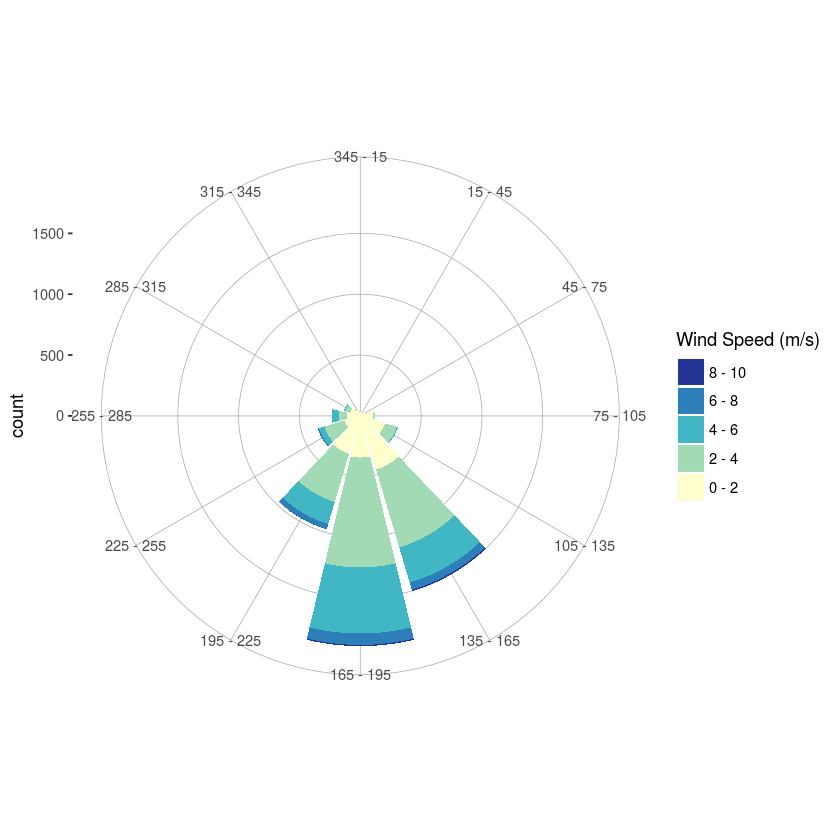

In [133]:
wind_data %>% 
    na.omit() %>%
    plot.windrose("wind_speed", "wind_direction",
                  spdmin = 0, spdmax = 10)

And there we have the wind rose data from our measurement campaign in Overpelt!

# More information about wateRinfo?

Curious about:
* donwloading other variables?
* combining multiple downloads as a batch download?
* alternative ways of defining the date periods?

**Check** the documentation: https://inbo.github.io/wateRinfo/